<a href="https://colab.research.google.com/github/Danilo-CVM/TCC/blob/main/V1_LSTM_previs%C3%A3o_com_DJI_e_avalia%C3%A7%C3%A3o_percentual_de_acertos_pronta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.debugger import set_trace
import os
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
!pip install --upgrade ta

from ta.utils import dropna

plt.style.use(style="seaborn")
%matplotlib inline

  Created wheel for ta: filename=ta-0.7.0-cp36-none-any.whl size=28718 sha256=d1dd723e029b957e3f890334af2dafb991c184fffeb2fe49fb80a46e57fb6722
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [2]:
# Importando Bibliotecas para extração de dados do Yhoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
yf.pdr_override()

     |████████████████████████████████| 5.5MB 11.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=5624babd4cdb5115e36e647f1cfee74b562d1ec49ac82d9c0a5eee11853ca039
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6xy5haj/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Definindo dados da importação do banco de dados:

#Escolha a ação
stock= "^DJI"

#Escolha o inicio do período
startyear=1994
startmonth=1
startday=1

start=dt.datetime(startyear,startmonth,startday)

#Escolha o final do período
endyear = 2018
endmonth = 12
endday = 20

now=dt.datetime(endyear,endmonth,endday)

#Rascunho - Código para a escolha dos últimos dados
#now=dt.datetime.now()

df=pdr.get_data_yahoo(stock,start,now)
#Dado semanais
#df=pdr.get_data_yahoo(stock,start,now, interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6287 entries, 1994-01-03 to 2018-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6287 non-null   float64
 1   High       6287 non-null   float64
 2   Low        6287 non-null   float64
 3   Close      6287 non-null   float64
 4   Adj Close  6287 non-null   float64
 5   Volume     6287 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 343.8 KB


#A única variável a ser utilizada no momento é "Close"




In [5]:
df = df[["Close"]]

In [6]:
df.describe()

,Close
count,6287.000000
mean,11782.819948
std,4941.041266
min,3593.350098
25%,8899.455078
50%,10727.190430
75%,13543.140137
max,26828.390625


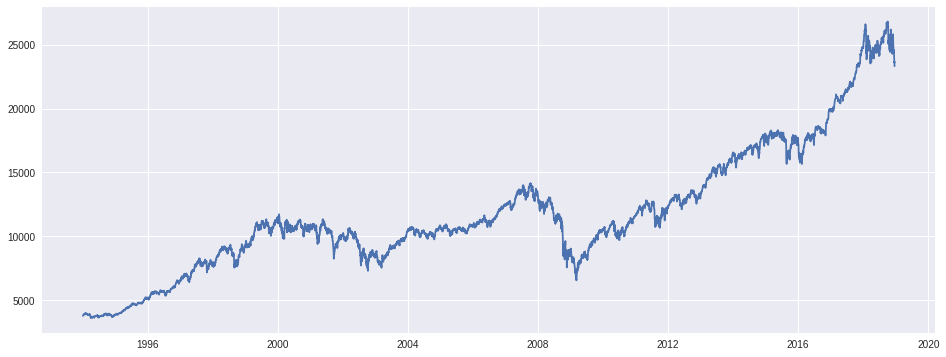

In [7]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(df.Close)

Calcule a variação percentual.

A razão para usar pct_change em vez dos preços de fechamento é o benefício da normalização, pois podemos medir todas as variáveis ​​em uma métrica comparável. Além disso, os retornos têm propriedades estatísticas mais gerenciáveis ​​do que os preços, como estacionariedade, pois na maioria dos casos não temos preços estacionários, mas podemos ter retornos estacionários.

Uma série temporal estacionária é aquela em que as propriedades estatísticas, como média, variância, correlação, etc., são constantes ao longo do tempo. Para mais detalhes sobre estacionariedade: https://en.wikipedia.org/wiki/Stationary_process

In [8]:
df["returns"] = df.Close.pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.head(5)

,Close,returns
Date,,
1994-01-03,3756.600098,NaN
1994-01-04,3783.899902,0.007267
1994-01-05,3798.820068,0.003943
1994-01-06,3803.879883,0.001332
1994-01-07,3820.770020,0.004440


In [10]:
134.75 / 132.89 - 1

0.013996538490480992

*Calculando* o log returns.

Por que usar Log Returns: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

In [11]:
df["log_returns"] = np.log(1 + df["returns"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.head(5)

,Close,returns,log_returns
Date,,,
1994-01-03,3756.600098,NaN,NaN
1994-01-04,3783.899902,0.007267,0.007241
1994-01-05,3798.820068,0.003943,0.003935
1994-01-06,3803.879883,0.001332,0.001331
1994-01-07,3820.770020,0.004440,0.004430


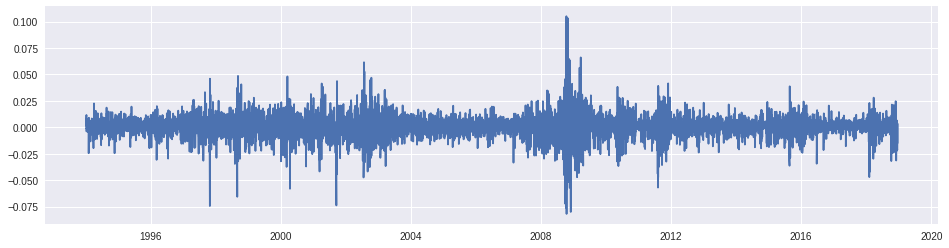

In [13]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.log_returns)

In [14]:
df.dropna(inplace=True)
X = df[["Close", "log_returns"]].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
X

array([[ 3.78389990e+03,  7.24087898e-03],
       [ 3.79882007e+03,  3.93531222e-03],
       [ 3.80387988e+03,  1.33105745e-03],
       ...,
       [ 2.35929805e+04, -2.12837624e-02],
       [ 2.36756406e+04,  3.49746782e-03],
       [ 2.33236602e+04, -1.49783951e-02]])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [18]:
X_scaled[:5]

array([[0.00820097, 0.47702541],
       [0.00884311, 0.45935695],
       [0.00906087, 0.44543705],
       [0.0097878 , 0.46200328],
       [0.01171334, 0.50054781]])

In [19]:
y = [x[0] for x in X_scaled]

In [20]:
y[:5]

[0.008200967175557738,
 0.008843107911144843,
 0.009060874454188766,
 0.009787799664363162,
 0.011713339246776366]

#### Train test split

In [21]:
split = int(len(X_scaled) * 0.8)
print(split)

5028


In [22]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

#Garantindo que o número de linhas de X e Y são iguais para evitar erros

In [23]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

#### Labeling

Queremos prever o preço das ações no futuro. Vamos prever o preço da ação no momento t + 1 em relação ao preço da ação no momento t.

Como vamos usar uma arquitetura LSTM, sabemos que ela tem memória e que é mantida configurando o intervalo de tempo, basicamente quantos passos no passado queremos que o LSTM use.

O intervalo de tempo refere-se a quantos passos no tempo queremos que o algoritmo de retropropagação use ao calcular gradientes para atualizações de peso durante o treinamento.

Portanto, podemos usar um método para criar o timestep e a variável de saída, ot + 1.

In [24]:
#Criando um array contendo dados de "n" dias a serem usados para a previsão. O valor de n é a definição de quantos "timesteps" a LSTM vai utilizar. 
#Nesse mesmo método já acertamos a variável y para o dia seguinte, pois como queremos prever o dia seguinte, essa variável deve ser deslocada em um dia.
n = 40
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  # prevendo o próximo
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i])  # prevendo o próximo

In [25]:
df.head(5)

,Close,returns,log_returns
Date,,,
1994-01-04,3783.899902,0.007267,0.007241
1994-01-05,3798.820068,0.003943,0.003935
1994-01-06,3803.879883,0.001332,0.001331
1994-01-07,3820.770020,0.004440,0.004430
1994-01-10,3865.510010,0.011710,0.011642


In [26]:
Xtrain[0]

array([[0.00820097, 0.47702541],
       [0.00884311, 0.45935695],
       [0.00906087, 0.44543705],
       [0.0097878 , 0.46200328],
       [0.01171334, 0.50054781],
       [0.01105916, 0.4172632 ],
       [0.01098684, 0.43598951],
       [0.01072001, 0.4297049 ],
       [0.01178607, 0.47266853],
       [0.01191906, 0.44259174],
       [0.01191906, 0.43832247],
       [0.01252505, 0.45773246],
       [0.0128517 , 0.44875623],
       [0.01382093, 0.46916142],
       [0.0137482 , 0.43601442],
       [0.01299718, 0.41443168],
       [0.01354204, 0.45566583],
       [0.01432965, 0.46329344],
       [0.01515297, 0.46430166],
       [0.01657023, 0.48274939],
       [0.01595263, 0.41900777],
       [0.01644886, 0.45384696],
       [0.01610971, 0.42771723],
       [0.01196769, 0.30707378],
       [0.01346974, 0.48629133],
       [0.01345726, 0.43792559],
       [0.01457152, 0.47363363],
       [0.01299718, 0.388363  ],
       [0.01297308, 0.43755392],
       [0.01337247, 0.45104291],
       [0.

In [27]:
ytrain[0]

0.01025993013860163

In [28]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

#Confirmando que Y[0] é o quarto valor da coluna Close, ou seja, o primeiro dia a ser previsto utilizando os dados dos 3 primeiros dias da base

In [29]:
scaler.inverse_transform(val)

array([[ 3.83173999e+03, -8.20051358e-02]])

#Em uma rede LSTM, as entradas para cada camada precisam conter as seguintes informações:



*   O número de observações
*   O número de passos (Timesteps)
*   Quantas informações existem em cada passo

Precisamos adicionar uma dimensão temporal para esse tipo de rede neural

In [30]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [31]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(4988, 40, 2)
(4988,)
---
(1218, 40, 2)
(1218,)


#### Modelo LSTM 

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [33]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(
    Xtrain, ytrain, epochs=500, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/500
312/312 [==============================] - 6s 12ms/step - loss: 0.0462 - val_loss: 0.0024
Epoch 2/500
312/312 [==============================] - 3s 10ms/step - loss: 4.6690e-04 - val_loss: 0.0032
Epoch 3/500
312/312 [==============================] - 3s 10ms/step - loss: 3.2745e-04 - val_loss: 0.0058
Epoch 4/500
312/312 [==============================] - 3s 10ms/step - loss: 2.4158e-04 - val_loss: 0.0081
Epoch 5/500
312/312 [==============================] - 3s 10ms/step - loss: 2.0554e-04 - val_loss: 0.0095
Epoch 6/500
312/312 [==============================] - 3s 10ms/step - loss: 1.6805e-04 - val_loss: 0.0105
Epoch 7/500
312/312 [==============================] - 3s 10ms/step - loss: 1.6556e-04 - val_loss: 0.0098
Epoch 8/500
312/312 [==============================] - 3s 10ms/step - loss: 1.3374e-04 - val_loss: 0.0094
Epoch 9/500
312/312 [==============================] - 3s 9ms/step - loss: 1.1374e-04 - val_loss: 0.0068
Epoch 10/500
312/312 [=============================

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [39]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: ignored

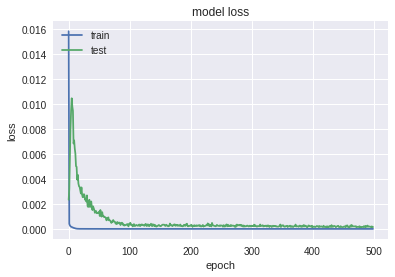

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Agora vamos aplicar o modelo

In [42]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

#Concatenamo o Array de previsão com um array de zeros, pra que os dados estejam em um formato aceitável para a transformação inversa da normalização

In [43]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

#invertendo para valores reais com o scaler e removendo a segunda coluna de zeros

In [44]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]


In [45]:
print(trainPredict[-5:])
print(testPredict[-5:])

[15782.940522474704, 15793.215216778715, 15921.840706491525, 15919.446186144896, 16193.56960130387]
[24148.401628580268, 24193.34631846409, 23854.82290871948, 23426.640015319168, 23426.45997619536]


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
# calculate root mean squared error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 10233.89 RMSE
Test Score: 20000.38 RMSE


In [48]:
Y_compare = np.c_[ytest, np.zeros(ytest.shape)]
Y_compare = scaler.inverse_transform(Y_compare)
Y_compare = [x[0] for x in Y_compare]

In [49]:
print(Y_compare[-10:])
print(testPredict[-10:])

[24947.669921875, 24388.94921875, 24423.259765624996, 24370.240234375, 24527.269531250004, 24597.380859375, 24100.509765625, 23592.980468749996, 23675.640625, 23323.660156249996]
[24598.20722074976, 24407.616419371716, 24134.915313290814, 24067.053027862745, 24068.72600679781, 24148.401628580268, 24193.34631846409, 23854.82290871948, 23426.640015319168, 23426.45997619536]


In [57]:
evaluate = pd.DataFrame(Y_compare, testPredict)

In [58]:
evaluate.tail(10)

,0
24598.207221,24947.669922
24407.616419,24388.949219
24134.915313,24423.259766
24067.053028,24370.240234
24068.726007,24527.269531
24148.401629,24597.380859
24193.346318,24100.509766
23854.822909,23592.980469
23426.640015,23675.640625
23426.459976,23323.660156


In [59]:
evaluate['Previsto'] = evaluate.index

In [60]:
evaluate.reset_index(drop=True, inplace=True)

In [61]:
evaluate.columns=['Real', 'Previsto']

In [62]:
evaluate.head(15)

,Real,Previsto
0,16133.230469,16077.744893
1,16103.299805,16158.016029
2,16207.139648,16142.841501
3,16179.660156,16235.475785
4,16198.410156,16219.047907
5,16272.650391,16231.269794
6,16321.709961,16304.252115
7,16168.030273,16355.512023
8,16395.880859,16217.205968
9,16360.179688,16412.631513


In [63]:
evaluate["% Real"] = evaluate.Real.pct_change()
evaluate["% Previsto"] = evaluate.Previsto.pct_change()

In [64]:
evaluate.head(15)

,Real,Previsto,% Real,% Previsto
0,16133.230469,16077.744893,NaN,NaN
1,16103.299805,16158.016029,-0.001855,0.004993
2,16207.139648,16142.841501,0.006448,-0.000939
3,16179.660156,16235.475785,-0.001696,0.005738
4,16198.410156,16219.047907,0.001159,-0.001012
5,16272.650391,16231.269794,0.004583,0.000754
6,16321.709961,16304.252115,0.003015,0.004496
7,16168.030273,16355.512023,-0.009416,0.003144
8,16395.880859,16217.205968,0.014093,-0.008456
9,16360.179688,16412.631513,-0.002177,0.012051


In [65]:
def compare(real, previsto):
  if (real < 0 and previsto < 0) or (real > 0 and previsto > 0):
    return 1
  else:
    return 0


In [66]:
def compare2(dataframe):
  if (dataframe[2] < 0 and dataframe[3] < 0) or (dataframe[2] > 0 and dataframe[3] > 0):
    return 1
  else:
    return 0

In [67]:
evaluate['Compare'] = evaluate.apply(compare2, axis=1)

In [68]:
evaluate.head(10)

,Real,Previsto,% Real,% Previsto,Compare
0,16133.230469,16077.744893,NaN,NaN,0
1,16103.299805,16158.016029,-0.001855,0.004993,0
2,16207.139648,16142.841501,0.006448,-0.000939,0
3,16179.660156,16235.475785,-0.001696,0.005738,0
4,16198.410156,16219.047907,0.001159,-0.001012,0
5,16272.650391,16231.269794,0.004583,0.000754,1
6,16321.709961,16304.252115,0.003015,0.004496,1
7,16168.030273,16355.512023,-0.009416,0.003144,0
8,16395.880859,16217.205968,0.014093,-0.008456,0
9,16360.179688,16412.631513,-0.002177,0.012051,0


In [69]:
evaluate.Compare.sum()

616

In [70]:
Indice_Acerto = (evaluate.Compare.sum())/len(evaluate)
print("O indice de acerto é:")
print(Indice_Acerto)

O indice de acerto é:
0.5057471264367817
